# # Amazon Echo Reviews Dataset
Goal: Find the words most frequently used in positive reviews and negative reviews.

# Setup

In [14]:
import nltk
import numpy as np
import pandas as pd 
from collections import Counter

# Read the file
filename = "../input/amazon-echo-dot-2-reviews-dataset/Amazon Echo 2 Reviews.csv"
df = pd.read_csv(filename)

df.head() # Sample output

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,10/3/2017,NaN,Echo Dot,3,NaN
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,9/26/2017,NaN,Echo Dot,4,NaN
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,9/8/2017,NaN,Echo Dot,5,NaN
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,10/19/2017,NaN,Echo Dot,5,NaN
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN


In [15]:
''' The title column was originally combined with review text since the titles 
provide some additional info but was changed because most titles just indicate 
the number of stars'''
df['Review'] = df['Review Text'] # + " " + df['Title']

# Format the review column
df['Review'] = df.Review.astype(str)
df['Review'] = df['Review'].str.lower().str.replace('[^\w\s]','',regex=True)

# Reduce to just reviews and ratings
df = df[['Review', 'Rating']]

# Split into positive & negative reviews based on ratings
positive = df[df['Rating'] > 3]
# Not counting 3 since it's considered neutral
negative = df[df['Rating'] < 3]

negative.head() # Sample output

,Review,Rating
8,died after a few months and not eligible for r...,1
29,didnt know a lot,2
40,i love my echo its convenient and fun product ...,2
45,somewhat satisfied but sometimes it wont stop ...,1
48,i use dish network 1st echo dot works great wi...,1


<AxesSubplot:xlabel='Word'>

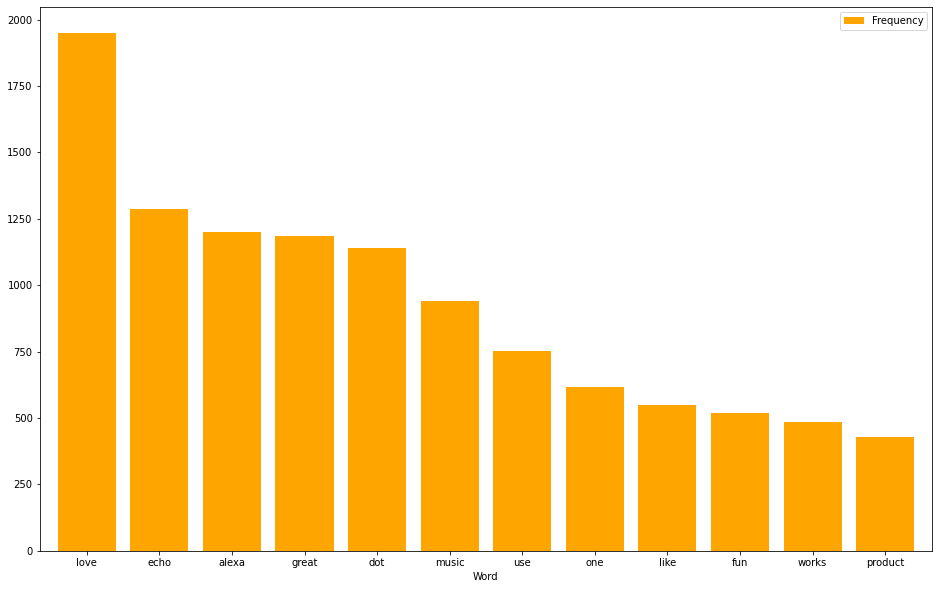

In [16]:
# Use nltk to get rid of stopwords like 'the', 'a', 'an', 'in'
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# Create a list of words for positive and negative reviews
pos_txt = (positive.Review.str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ').split())

neg_txt = (negative.Review.str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ').split())


# Get the top n number of words for each list
n = 50

# Generate a df out of counter for each word & it's frequency
pos_freq = pd.DataFrame(Counter(pos_txt).most_common(n),
                    columns=['Word', 'Frequency'])

neg_freq = pd.DataFrame(Counter(neg_txt).most_common(n),
                    columns=['Word', 'Frequency'])


# Example graph of top words
pos_freq12 = pd.DataFrame(Counter(pos_txt).most_common(12),
                    columns=['Word', 'Frequency']).set_index('Word')
pos_freq12.plot.bar(rot=0, figsize=(16,10), width=0.8, color='orange')

# Top Positive Words

In [17]:
print(pos_freq)

         Word  Frequency
0        love       1949
1        echo       1287
2       alexa       1202
3       great       1184
4         dot       1141
5       music        939
6         use        753
7         one        618
8        like        547
9         fun        520
10      works        484
11    product        430
12       good        424
13    speaker        410
14        get        403
15       play        383
16       much        375
17     amazon        341
18       home        340
19     device        332
20      would        331
21         im        329
22        set        323
23       easy        320
24       well        312
25     little        309
26     bought        303
27       time        301
28     really        300
29      house        300
30     things        289
31        ask        272
32      sound        259
33    weather        258
34       room        250
35       also        238
36      still        235
37     better        213
38       dont        212


# Top Negative Words

In [18]:
print(neg_freq)

            Word  Frequency
0           echo        265
1          alexa        204
2         amazon        201
3          music        190
4            dot        187
5           work        155
6            get        150
7            one        147
8          would        139
9            use        137
10        device        132
11        doesnt        131
12          time        129
13          dont        123
14          like        111
15          cant         96
16          play         95
17          know         87
18       product         85
19       speaker         84
20            im         82
21        really         78
22         sound         77
23         phone         76
24          even         74
25          good         72
26        google         69
27        bought         69
28          back         66
29        months         65
30         still         65
31           buy         65
32       connect         64
33          wifi         64
34         great    

# Analyzing the Data
Looking over the results, there are a few things that would make this analysis more efficient. First, getting rid of words that obviously don't hold any real meaning but have a high frequency in both negative and positive reviews (like "amazon", "echo", "dot", etc.) can make analysis faster. Secondly, since quite a few words that could hold meaning appear on both lists, it would be interesting to create a split bar chart to  see if certain words correlate more with a positive sentiment or a negative sentiment. For example, the word "speaker" appears on both the positive and negative list. If "speaker" appeared 100 times total with 50 uses in positive reviews and 50 uses in negative reviews (assuming both lists have an equal amount of words), we wouldn't be able to draw a conclusion about whether or not the speakers on Echo is a pro or a con of the product. On the other hand, "connect" is something that appears exclusively on the negative reviews list. This could indicate to Amazon that people are having a hard time connecting their Echo and therefore maybe clearer instructions on connection can lead to better reviews (and therefore more sales). Comparably, "weather" is a word that appears exclusively on the positive reviews list. This could indicate that people often use their Echo to check the weather and maybe this feature is worth advertising more. However, both these examples would require further validation by looking at what exactly some of these reviews said. For instance, "warranty" appears in a high frequency on the negative reviews list, but this could be due to people literally having a problem with their warranty or to people being thankful they got a warranty because something went wrong (hence the bad review). Furthermore, this type of analysis could also be useful in the situation we aren't given any ratings to work with. If we could figure out which words correlate the most with which ratings, we could make a somewhat accurate assumption of sentiment based purely on the wording of a review.